In [2]:
file = open("style.css")
styl = read(file, String)
HTML("$styl")

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\r\n\r\n<style>\r\n\r\n@font-face {\r\n    font-family: \"Computer Modern\";\r\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\r\n}\r\n\r\n\r\n\r\n/* Formatting for header cells */\r\n.text_cell_render h1 {\r\n    font-family: 'Philosopher', sans-serif;\r\n    font-weight: 400;\r\n    font-size: 2.2em;\r\n    line-height: 100%;\r\n    color: rgb(0, 80, 120);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n.text_cell_render h2 {\r\n    font-family: 'Philosopher', serif;\r\n    font-weight: 400;\r\n    font-size: 1.9em;\r\n    line-height: 100%;\r\n    color: rgb(200,100,0);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n\r\n.text_cell_render h3 {\r\n    font-family: 'Philosopher', serif;\r\n    margin-top:12px;\r\n    margin-bottom: 3px;\r\n    font-style: italic;\r\n    color: rgb(94,127,192);\r\n}\r\n\r\n.text_cell_render h4 {\r\n    font-family: 'Philosopher', serif;\r\n}\r\n\r\n.text_cell_render h5 {\r\n    font-family: 'Alegreya Sans', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 16pt;\r\n    color: grey;\r\n    font-style: italic;\r\n    margin-bottom: .1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\r\n\r\n.text_cell_render h6 {\r\n    font-family: 'PT Mono', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 10pt;\r\n    color: grey;\r\n    margin-bottom: 1px;\r\n    margin-top: 1px;\r\n}\r\n\r\n.CodeMirror{\r\n        font-family: \"PT Mono\";\r\n        font-size: 100%;\r\n}\r\n\r\n</style>\r\n\r\n")

### The threshhold prediction equations

#### Susceptible:
$$ S(t_t+1) = S(t_i) - \lambda S(t_i)I(t_i)dt $$
#### Infected
$$ I(t_t+1) = I(t_i) - \lambda S(t_i)I(t_i)dt - \gamma I(t_i)dt $$
#### Removed
$$ R(t_t+1) = R(t_i) - \gamma I(t_i)dt $$

In [3]:
function update_sir(pop_vector)
    susceptible = pop_vector[1]
    infected = pop_vector[2]
    removed = pop_vector[3]
    new_s = susceptible - λ * susceptible * infected * dt
    new_i = infected + λ * susceptible * infected * dt - γ * infected * dt
    new_r = removed + γ * infected * dt
    [new_s new_i new_r]
end

update_sir (generic function with 1 method)

In [4]:
[3, 4, 5]

3-element Array{Int64,1}:
 3
 4
 5

In [5]:
[3 4 5]

1×3 Array{Int64,2}:
 3  4  5

In [6]:
[3; 4; 5;]

3-element Array{Int64,1}:
 3
 4
 5

In [7]:
[3:4:5]

1-element Array{StepRange{Int64,Int64},1}:
 3:4:3

In [11]:
γ = 1/20.
λ = 0.0005
dt = 0.5
tfinal = 610.
s0 = 150.
i0 = 4.
r0 = 0.

nsteps = round(Int64, tfinal/dt)
result_vals = Array{Float64}(undef, nsteps + 1, 3)
time_vec = Array{Float64}(undef, nsteps + 1)
result_vals[1, :] = [s0, i0, r0]
time_vec[1] = 0.

for step = 1:nsteps
    result_vals[step + 1, :] = update_sir(result_vals[step, :])
    time_vec[step + 1] = time_vec[step] + dt
end

In [12]:
using Plots
gr()

Plots.GRBackend()

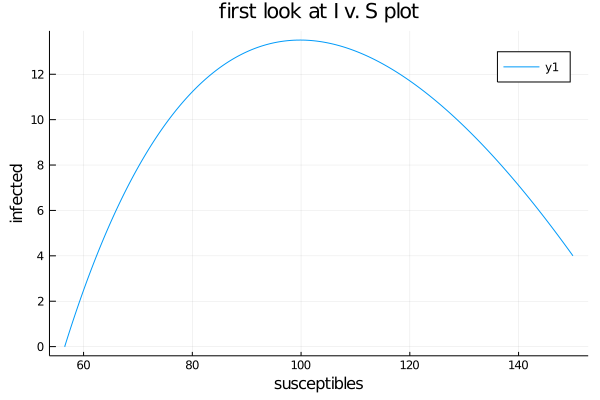

In [13]:
s_vals = result_vals[:, 1]
i_vals = result_vals[:, 2]

plot(s_vals, i_vals, title = "first look at I v. S plot", xlabel = "susceptibles", ylabel = "infected")